This is a tutorial in an IPython Notebook for the Kaggle competition, Titanic Machine Learning From Disaster. The goal of this repository is to provide an example of a competitive analysis for those interested in getting into the field of data analytics or using python for Kaggle's Data Science competitions.

[kaggle](https://www.kaggle.com/c/titanic)

###Dependencies:

* NumPy
* IPython
* Pandas
* SciKit-Learn
* SciPy
* StatsModels
* Patsy
* Matplotlib

###This Notebook will show basic examples of:

* Data Handling
* Importing Data with Pandas
* Cleaning Data
* Exploring Data through Visualizations with Matplotlib
* Data Analysis

###Supervised Machine learning Techniques:

* Logic Regression Model
* Plotting results
* Support Vector Machine (SVM) using 3 kernels
* Basic Random Forest
* Plotting results

###Valuation of the Analysis

* K-folds cross validation to valuate results locally
* Output the results from the IPython Notebook to Kaggle

###data：
titanic_test.csv

titanic_train.csv

###VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
                
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
                
name            Name

sex             Sex

age             Age

sibsp           Number of Siblings/Spouses Aboard

parch           Number of Parents/Children Aboard

ticket          Ticket Number

fare            Passenger Fare

cabin           Cabin

embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
                

###SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [31]:
# -*- coding: utf-8 -*-

# machine learning
import pandas as pd
import numpy as np
# plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Import the linear regression class
from sklearn.linear_model import LinearRegression
# Sklearn also has a helper that makes it easy to do cross validation
from sklearn.cross_validation import KFold
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression


trian_name = 'titanic_train.csv'
titanic = pd.read_csv(trian_name,dtype={"Age": np.float64})
print(titanic.head(5))  #preview the data

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
print(titanic.describe()) #notes count in Age，it can only count non-null value

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


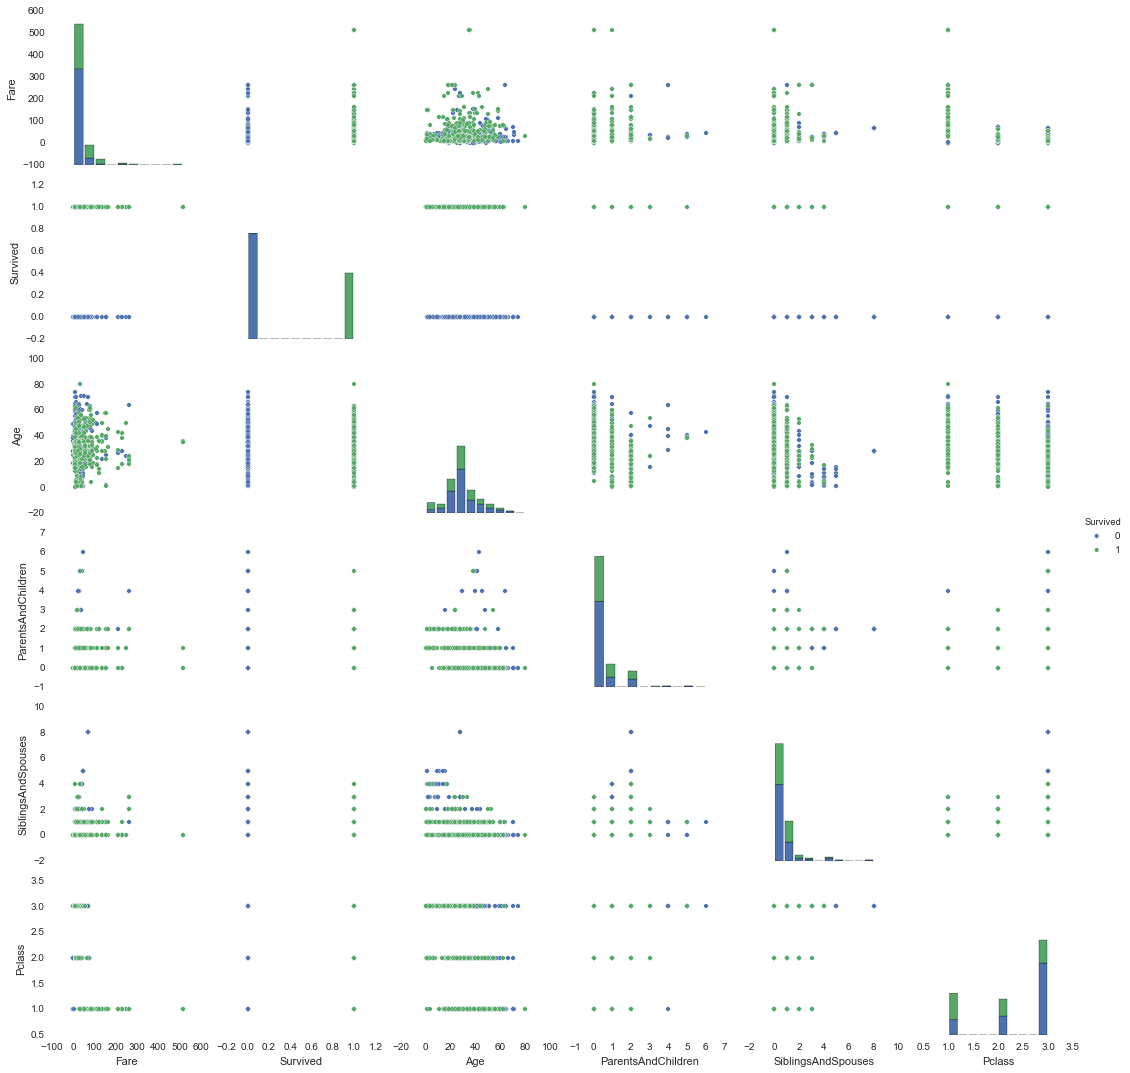

In [32]:
#fill 'age' with median
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

titanic["ParentsAndChildren"] = titanic["Parch"]
titanic["SiblingsAndSpouses"] = titanic["SibSp"]

plt.figure()
sns.pairplot(data=titanic[["Fare","Survived","Age","ParentsAndChildren","SiblingsAndSpouses","Pclass"]],
             hue="Survived", dropna=True)
plt.savefig("1_seaborn_pair_plot.png")

In [3]:

#trans Sex
print(titanic['Sex'].unique())

titanic.loc[titanic['Sex']=='male','Sex'] = 0

titanic.loc[titanic['Sex']=='female','Sex'] = 1

#trans Embarked
print titanic['Embarked'].unique()

titanic['Embarked'] = titanic['Embarked'].fillna('S')

titanic.loc[titanic['Embarked']=='S','Embarked'] = 0
titanic.loc[titanic['Embarked']=='C','Embarked'] = 1
titanic.loc[titanic['Embarked']=='Q','Embarked'] = 2

['male' 'female']
['S' 'C' 'Q' nan]


In [15]:
#linear regegression prddiction
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

alg = LinearRegression()

kf = KFold(titanic.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    train_predictors = (titanic[predictors].iloc[train,:])
    train_target = titanic['Survived'].iloc[train]
    alg.fit(train_predictors,train_target)
    test_predictions = alg.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)


#evalue error
predictions = np.concatenate(predictions,axis=0)

predictions[predictions> .5] = 1
predictions[predictions<=.5] = 0

accuracy = float(sum(predictions[predictions == titanic["Survived"]])) / len(predictions)
print 'linear regression\'s accuracy in cross_validation : ''%06.4f'%accuracy

linear regression's accuracy in cross_validation : 0.7834


/Users/xchao/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:23: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [13]:
#logistic regression
alg = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)
print('logistic regression: '+str(scores.mean()))

test_name = 'titanic_test.csv'
titanic_test = pd.read_csv(test_name)

titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0 
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")

titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

# Initialize the algorithm class
alg = LogisticRegression(random_state=1)

# Train the algorithm using all the training data
alg.fit(titanic[predictors], titanic["Survived"])

# Make predictions using the test set.
predictions = alg.predict(titanic_test[predictors])

logistic regression: 0.787878787879


In [ ]:
# Create a new dataframe with only the columns Kaggle wants from the dataset.
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv("kaggle.csv", index=False)